In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 209MB/s]
100% 1.06G/1.06G [00:05<00:00, 192MB/s]


In [7]:
#To unzip the folder downloaded from kaggle

import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
#generators divide images into batches and we can process large amount of data
#We will create two generators, one for training data and one for testing data

train_ds= keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [18]:
#Create CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3449 - accuracy: 0.5962 - val_loss: 0.5865 - val_accuracy: 0.6900
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5758 - accuracy: 0.7025 - val_loss: 0.5324 - val_accuracy: 0.7366
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4798 - accuracy: 0.7727 - val_loss: 0.5894 - val_accuracy: 0.6322
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4165 - accuracy: 0.8125 - val_loss: 0.4395 - val_accuracy: 0.7990
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3471 - accuracy: 0.8479 - val_loss: 0.9093 - val_accuracy: 0.5184
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2706 - accuracy: 0.8852 - val_loss: 0.4581 - val_accuracy: 0.8106
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1879 - accuracy: 0.9266 - val_loss: 0.6800 - val_ac

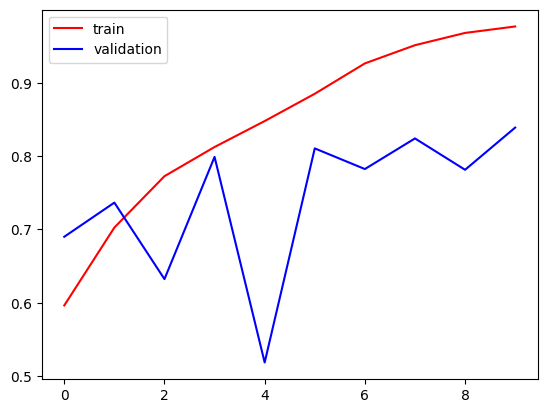

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

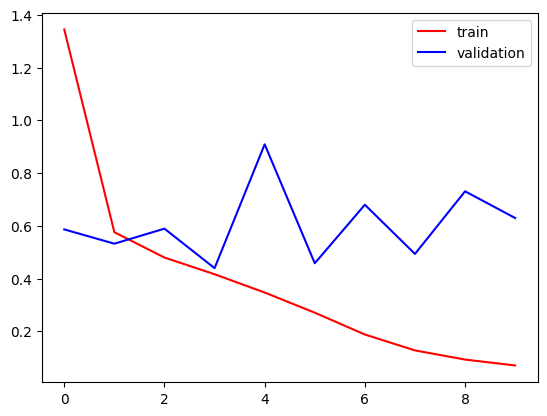

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()